In [70]:
# add folders to Python's search space
import os, sys
from pathlib import Path
script_dir = Path(os.path.dirname(os.path.abspath('')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)

# import the rest of the modules
%matplotlib nbagg
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import arch
import pandas as pd
DTYPE = 'float32'

C:\Users\pinak\Documents\GitHub\var-al


<IPython.core.display.Javascript object>


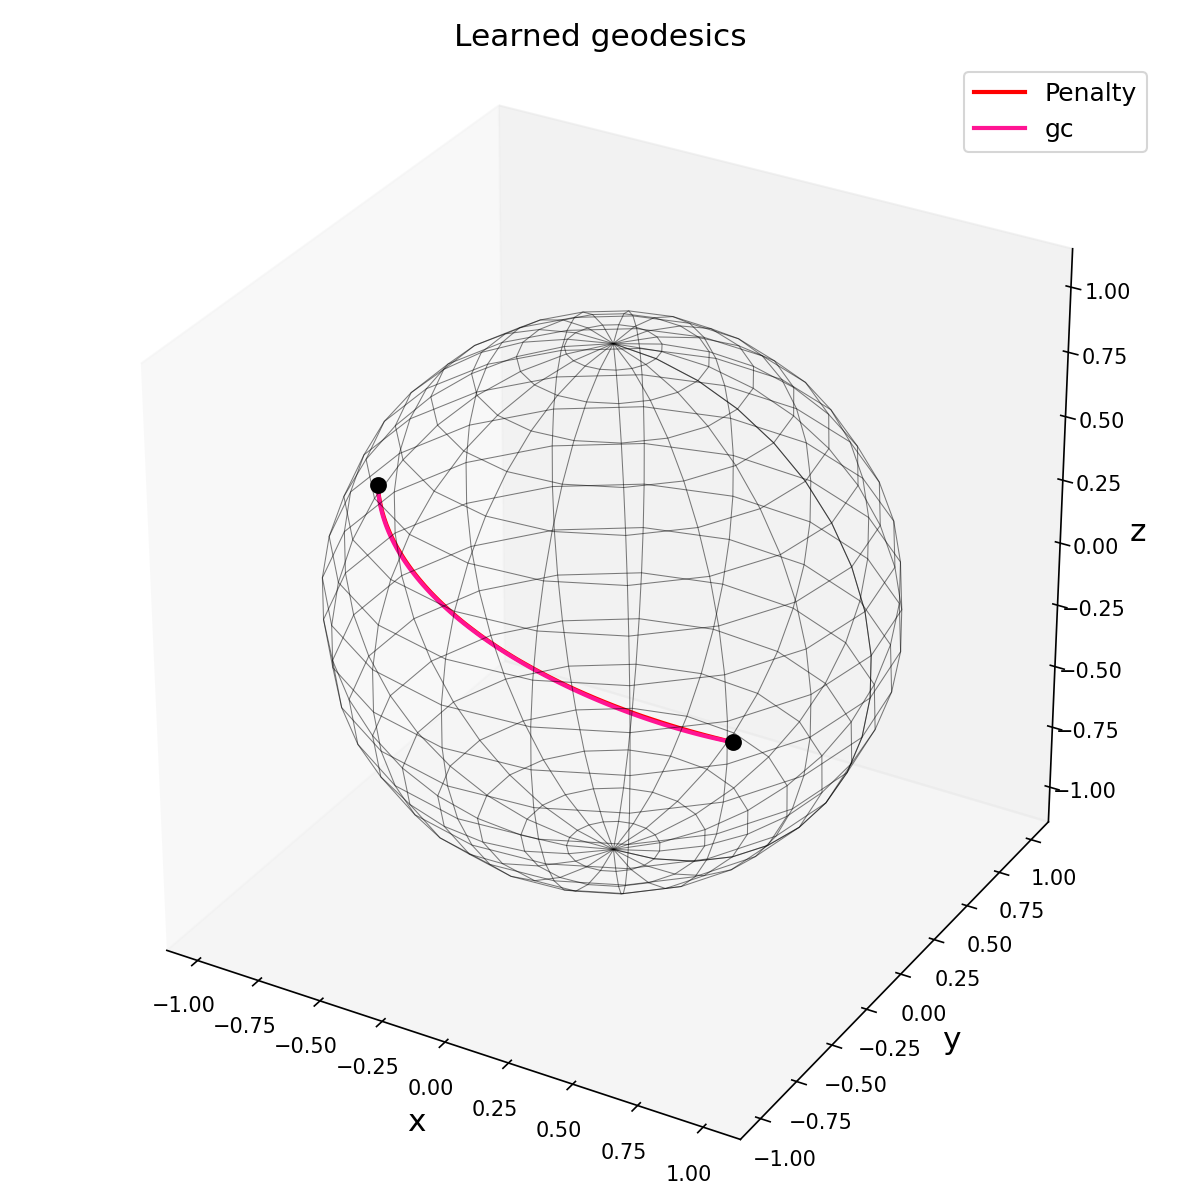

In [165]:
# load learned solutions
net_p = arch.VanillaNet(50, 3, DTYPE, name="sphere-geodesic")
net_p.load_weights('../data/sphere-geodesic/{}'.format(net_p.name)).expect_partial()

# net_al = arch.VanillaNet(50, 3, DTYPE, name='helicoid-al')
# net_al.load_weights('../data/helicoid-al/{}'.format(net_al.name)).expect_partial()

# set up plotting parameters
scale = 0
xlabel_size = ylabel_size = 15 + scale
tick_size = 10 + scale
legend_size = 15 + scale
title_size = 15 + scale
cbar_tick_size = 10 + scale
line_color = "darkgrey"

filename='../plots/sphere-geodesic'
resolution=20
# plot solutions

fig = plt.figure(figsize=(8, 8))
ax_p = fig.add_subplot(111, projection='3d')

# plotting params  
ax_p.tick_params(axis='both', which='major', labelsize=tick_size)
ax_p.tick_params(axis='both', which='minor', labelsize=tick_size)
ax_p.set_title('Learned geodesics', fontsize=title_size)
ax_p.set_xlabel('x', fontsize=xlabel_size)
ax_p.set_ylabel('y', fontsize=ylabel_size)
ax_p.set_zlabel('z', fontsize=ylabel_size)
root2 = np.sqrt(2., dtype=DTYPE)
root3 = np.sqrt(3., dtype=DTYPE)


root2 = np.sqrt(2., dtype=DTYPE)
root3 = np.sqrt(3., dtype=DTYPE)


v1 = np.array([-1., -1., 1 ], dtype=DTYPE)
v1 /= np.linalg.norm(v1) #/ root3
z, x = 0.0, 0.8
v2 = np.array([x, -np.sqrt((1-z**2-x**2)), z], dtype=DTYPE) 
w = v2 - np.dot(v1, v2)*v1
w = w/np.linalg.norm(w, ord=2)

alpha = np.arccos(v1[2], dtype=DTYPE)
phi_0 = np.arctan2(v1[1], v1[0], dtype=DTYPE) 
if phi_0 < 0:
    phi_0 += 2.*np.pi
beta = np.arccos(v2[2], dtype=DTYPE)
phi_1 = np.arctan2(v2[1], v2[0], dtype=DTYPE)
if phi_1 < 0:
    phi_1 += 2.*np.pi
gamma = np.arccos(np.dot(v1, v2), dtype=DTYPE)

def keep_neg(x):
    cond = tf.less(x, tf.zeros(tf.shape(x)))
    out = tf.where(cond, tf.zeros(tf.shape(x)), tf.ones(tf.shape(x)))
    return 1-out

def true(t):
    t1 = gamma * (t - alpha) / (beta - alpha)
    y =  tf.cos(t1) * v1[1] + tf.sin(t1) * w[1]
    x =  tf.cos(t1) * v1[0] + tf.sin(t1) * w[0]
    phi = tf.math.atan2(y, x)
    return phi + 2.*np.pi * keep_neg(phi)



p = np.linspace(0., 2.*np.pi, num=resolution, endpoint=True).astype(DTYPE)
t = np.linspace(0., np.pi, num=resolution, endpoint=True).astype(DTYPE)

p0, t0 = np.meshgrid(p, t)
p1 = np.ones_like(t)



c, s = np.cos(t0), np.sin(t0)
c1, s1 = np.cos(t), np.sin(t)
xs, ys, zs = s*np.cos(p0), s*np.sin(p0), c

ax_p.set_box_aspect((np.ptp(xs), np.ptp(ys), np.ptp(zs))) 
ax_p.plot_wireframe(xs, ys, zs, color='black', alpha=0.5, linewidth=0.5)
ax_p.scatter(v1[0], v1[1], v1[2], color='black', s=50)
ax_p.scatter(v2[0], v2[1], v2[2], color='black', s=50)

t1 = np.linspace(alpha, beta, num=100, endpoint=True).astype(DTYPE)
c1, s1 = np.cos(t1), np.sin(t1)

net_p = arch.VanillaNet(50, 3, DTYPE, name="sphere-geodesic")
net_p.load_weights('../data/sphere-geodesic/{}'.format(net_p.name)).expect_partial()

z_p = net_p(t1.reshape(-1, 1)).numpy()
phi = z_p.flatten()
ax_p.plot(s1*np.cos(phi), s1*np.sin(phi), c1, color='red', linewidth=2., label='Penalty')

z_p = true(t1.reshape(-1, 1)).numpy()
phi = z_p.flatten()
ax_p.plot(s1*np.cos(phi), s1*np.sin(phi), c1, color='deeppink', linewidth=2., label='gc')

#     net_p.load_weights('../data/sphere-geodesic-al/{}'.format(net_p.name)).expect_partial()
#     z_p = net_p(t1.reshape(-1, 1)).numpy()
#     phi = z_p.flatten()
#     ax_p.plot(s1*np.cos(phi), s1*np.sin(phi), c1, color='blue', linewidth=2, label='Augmented Lagrangian', linestyle='--')



ax_p.grid(False)
ax_p.legend(fontsize=legend_size-3)

fig.tight_layout()
plt.savefig('{}.png'.format(filename), dpi=300)
plt.show()

<IPython.core.display.Javascript object>


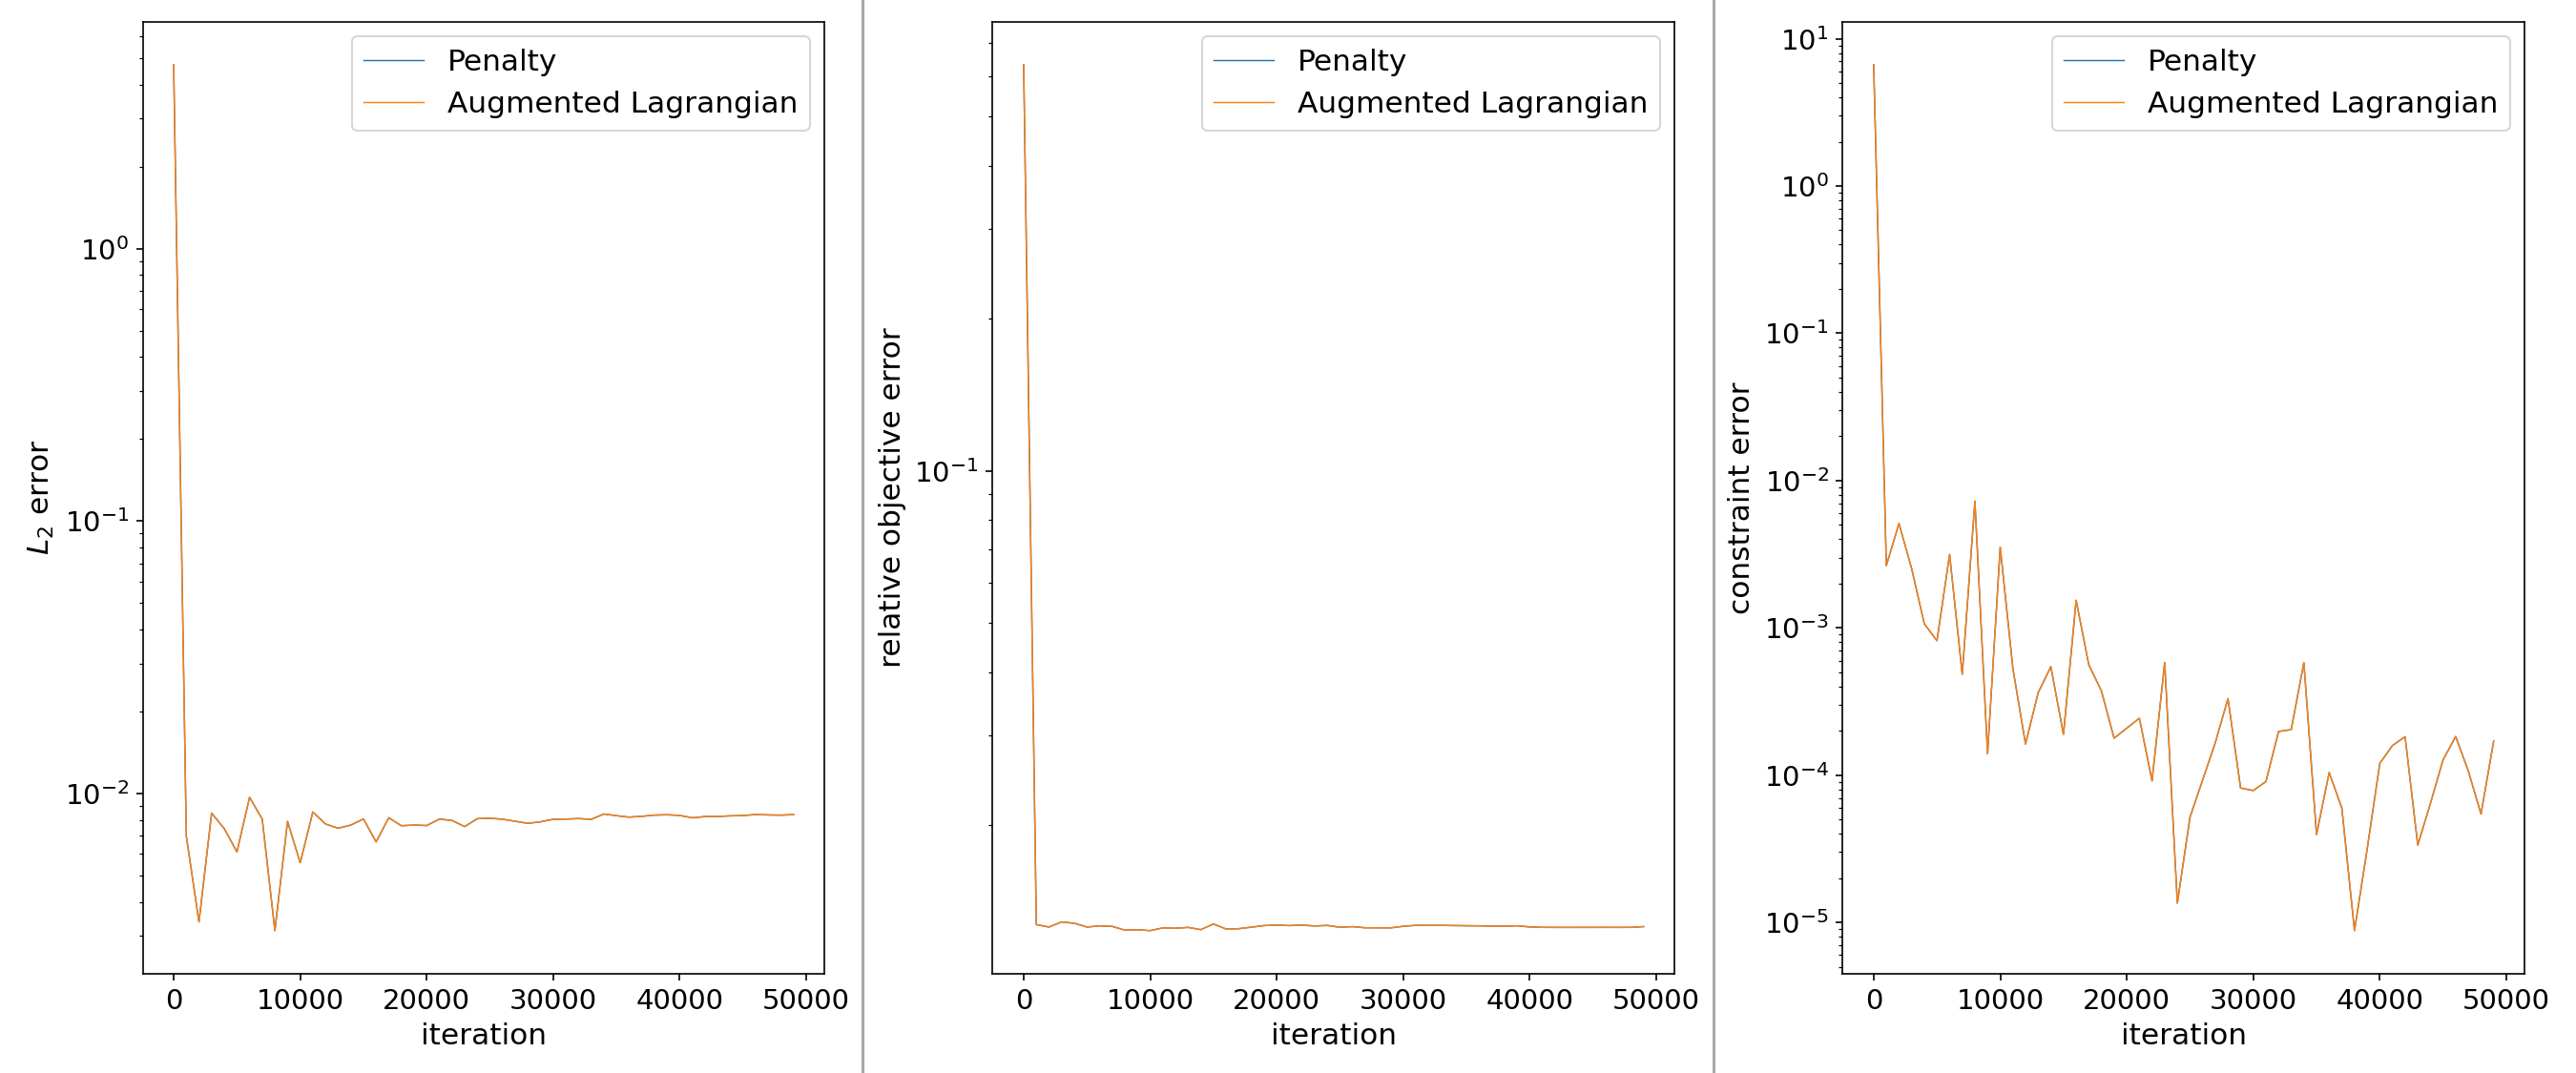

In [168]:
def smooth(y, box_pts=10):
    box = np.ones(box_pts)/box_pts
    y_smooth = y#np.convolve(y, box, mode='same')
    return y_smooth

tick_size = 14 + scale
def plot_errors(filename, start, last, interval, k):
    fig = plt.figure(figsize=(18, 7.5))
    ax_l = fig.add_subplot(131)
    ax_o = fig.add_subplot(132)
    ax_c = fig.add_subplot(133)
    # plotting params  
    ax_l.tick_params(axis='both', which='major', labelsize=tick_size)
    ax_l.tick_params(axis='both', which='minor', labelsize=tick_size)
    #ax_l.set_title('Penalty solution', fontsize=title_size)
    ax_l.set_xlabel('iteration', fontsize=xlabel_size)
    ax_l.set_ylabel(r'$L_2$ error', fontsize=ylabel_size)
    
    ax_o.tick_params(axis='both', which='major', labelsize=tick_size)
    ax_o.tick_params(axis='both', which='minor', labelsize=tick_size)
    #ax_o.set_title('Augmented Lagrangian solution', fontsize=title_size)
    ax_o.set_xlabel('iteration', fontsize=xlabel_size)
    ax_o.set_ylabel('relative objective error', fontsize=ylabel_size)

    ax_c.tick_params(axis='both', which='major', labelsize=tick_size)
    ax_c.tick_params(axis='both', which='minor', labelsize=tick_size)
    #ax_c.set_title('True solution', fontsize=title_size)
    ax_c.set_xlabel('iteration', fontsize=xlabel_size)
    ax_c.set_ylabel('constraint error', fontsize=ylabel_size)

    
    df_p = pd.read_csv('../data/sphere-geodesic/train_log.csv')
    df_al = pd.read_csv('../data/sphere-geodesic/train_log.csv')

    x = df_p['iteration'].to_numpy()[start:last:interval]
    ax_l.semilogy(x, smooth(df_p['L2-error'].to_numpy()[start:last:interval], k), linewidth=0.7, label='Penalty')
    ax_l.semilogy(x, smooth(df_al['L2-error'].to_numpy()[start:last:interval], k), linewidth=0.7, label='Augmented Lagrangian')
    ax_l.legend(fontsize=legend_size)
    ax_o.semilogy(x, smooth(np.abs(df_p['objective-error'].to_numpy()[start:last:interval]), k), linewidth=0.7, label='Penalty')
    ax_o.semilogy(x, smooth(np.abs(df_al['objective-error'].to_numpy()[start:last:interval]), k), linewidth=0.7, label='Augmented Lagrangian')
    ax_o.legend(fontsize=legend_size)
    ax_c.semilogy(x, smooth(np.abs(df_p['constraint-error'].to_numpy()[start:last:interval]), k), linewidth=0.7, label='Penalty')
    ax_c.semilogy(x, smooth(np.abs(df_al['constraint-error'].to_numpy()[start:last:interval]), k), linewidth=0.7, label='Augmented Lagrangian')
    ax_c.legend(fontsize=legend_size)

    fig.subplots_adjust(wspace=0.4, hspace=0.2)
#     Get the bounding boxes of the axes including text decorations
    l = 0.29
    line = plt.Line2D([l+.045,l+.045],[0.,1], transform=fig.transFigure, color=line_color)
    fig.add_artist(line)
    l = 0.62
    line = plt.Line2D([l+.045,l+.045],[0.,1], transform=fig.transFigure, color=line_color)
    fig.add_artist(line)
    fig.tight_layout()
    plt.savefig('{}.png'.format(filename), dpi=300)
    plt.show()
    

plot_errors('../plots/sphere-geodesic-error', start=0, last=500, interval=10, k=1)

In [129]:
np.arctan2(v2[1], v2[0], dtype=DTYPE) + 2.*np.pi

4.7123889366733

In [130]:
v2

array([ 0., -1.,  0.], dtype=float32)